In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset("ashraq/fashion-product-images-small")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/44072 [00:00<?, ? examples/s]

In [ ]:
df = pd.DataFrame(dataset['train'])

selected_columns = ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']
df_selected = df[selected_columns]
print(df_selected.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


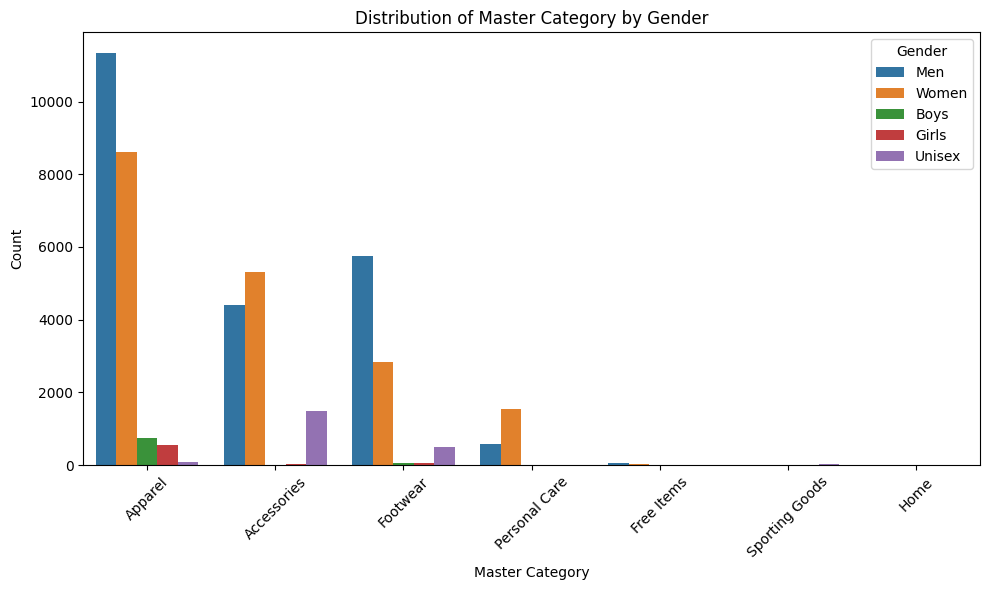

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='masterCategory', hue='gender')
plt.title('Distribution of Master Category by Gender')
plt.xlabel('Master Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('Distribution of Master Category by Gender.png')

plt.show()

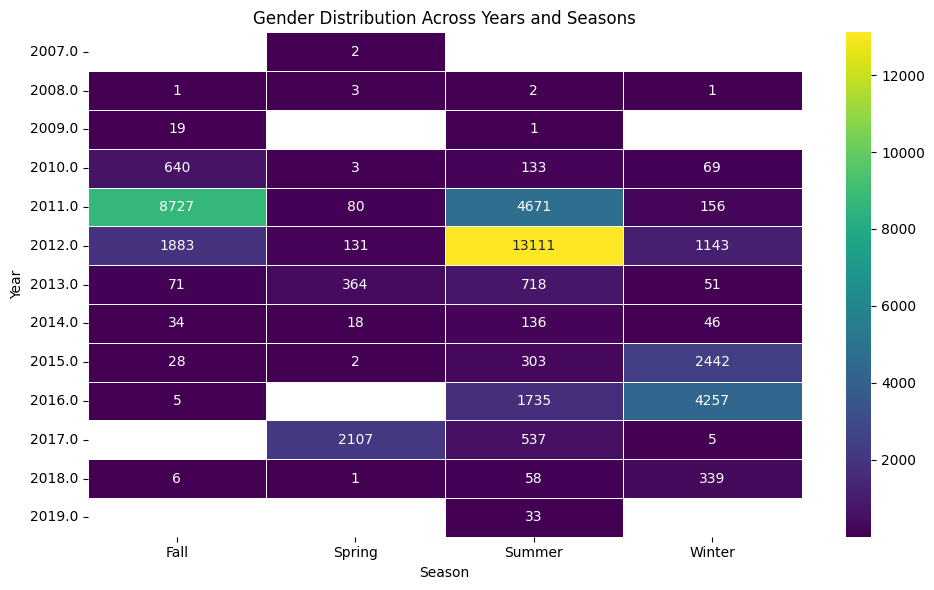

In [ ]:
df_filtered = df.dropna(subset=['year', 'season'])
pivot_table = df_filtered.pivot_table(index='year', columns='season', values='gender', aggfunc='count')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Gender Distribution Across Years and Seasons')
plt.xlabel('Season')
plt.ylabel('Year')
plt.tight_layout()
plt.tight_layout()
plt.savefig('gender_distribution_heatmap.png')

plt.show()

In [ ]:

# df['brand'] = df['productDisplayName'].str.split().str[0]
# unique_brands = df['brand'].unique()
# batches = [unique_brands[i:i+10] for i in range(0, len(unique_brands), 10)]
# for i, batch in enumerate(batches):
#     df_batch = df[df['brand'].isin(batch)]
#     plt.figure(figsize=(12, 6))
#     sns.countplot(data=df_batch, x='brand', hue='gender')
#     plt.title(f'Brand-wise Gender Distribution (Batch {i+1})')
#     plt.xlabel('Brand')
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.legend(title='Gender')
#     plt.tight_layout()
#     plt.savefig('pictures of brand analysis.png')
#     plt.show()


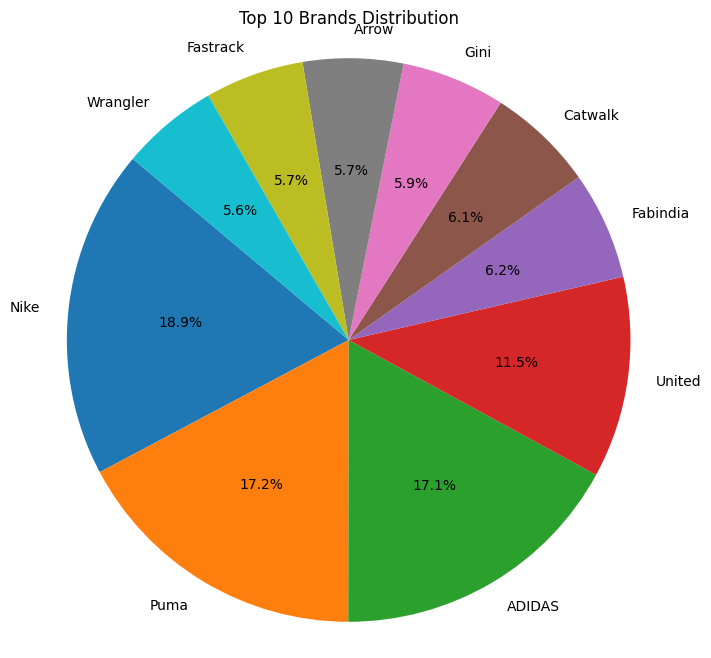

In [ ]:
df['brand'] = df['productDisplayName'].str.split().str[0]
brand_counts = df['brand'].value_counts()

top_brands = brand_counts.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Brands Distribution')
plt.axis('equal')
plt.savefig('Top 10 Brands Distribution.png')
plt.show()

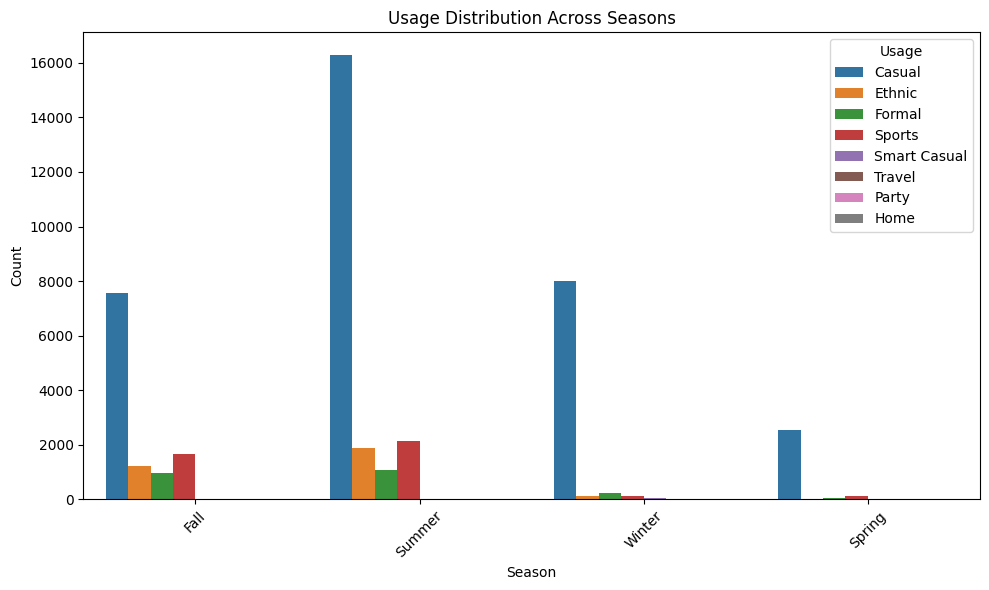

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='season', hue='usage')
plt.title('Usage Distribution Across Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Usage')
plt.tight_layout()
plt.savefig('Usage Based on Season.png')
plt.show()


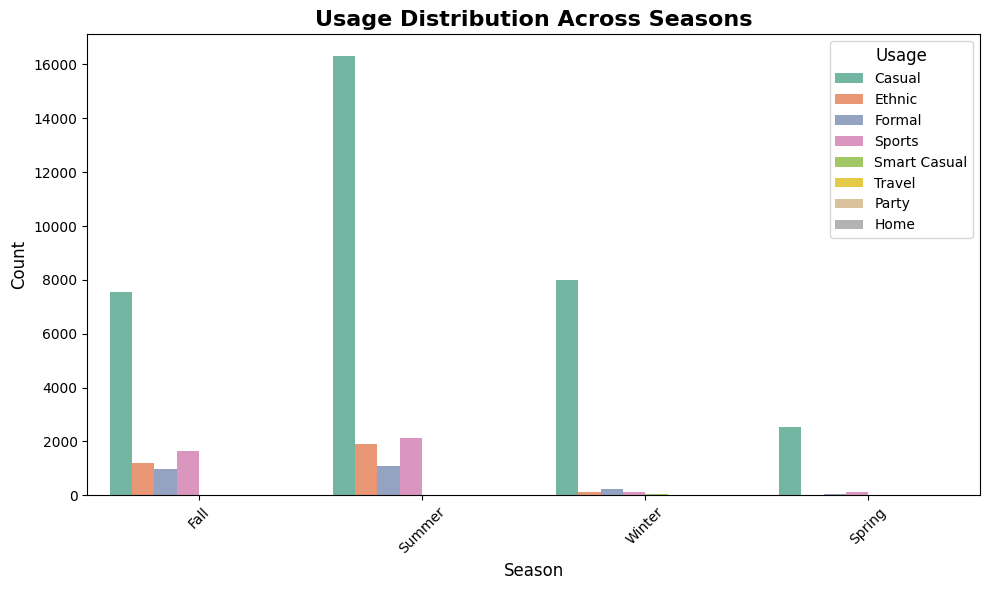

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='season', hue='usage', palette='Set2')
plt.title('Usage Distribution Across Seasons', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Usage', fontsize=10, title_fontsize='12')
plt.tight_layout()
plt.savefig('Usage_Based_on_Season.png', dpi=300)
plt.show()

In [ ]:
print("Number of Columns:", len(df.columns))
print("\nData Types:")
print(df.dtypes)

Number of Columns: 11

Data Types:
id                      int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
image                  object
dtype: object


In [ ]:
null_counts = df.isnull().sum()
print("Number of Null Values in Each Column:")
print(null_counts)

Number of Null Values in Each Column:
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
image                 0
dtype: int64
